In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import keras

In [2]:
from fbm import FBM # Fractional Brownian Motion

In [3]:
def quadratic_variation(B):
    return np.cumsum(np.power(np.diff(B, axis=0, prepend=0.), 2), axis=0)

In [4]:
n_points = 3000 * 3000 # time steps from t_0 = 0 to t = T
H = 0.5 # Hurst parameter. H = 0.5 is standard Brownian motion.
T = 1
f = FBM(n = n_points, hurst = H, length = T, method = 'daviesharte') # simulates the fractional brownian motion.
W_t = f.fbm()
times = f.times()

In [5]:
# import requests
# dir(f) # We can see that there is: fbm, fgn, hurst, length, method, n, times.

(Text(0.5, 1.0, 'H = 0.5'), None)

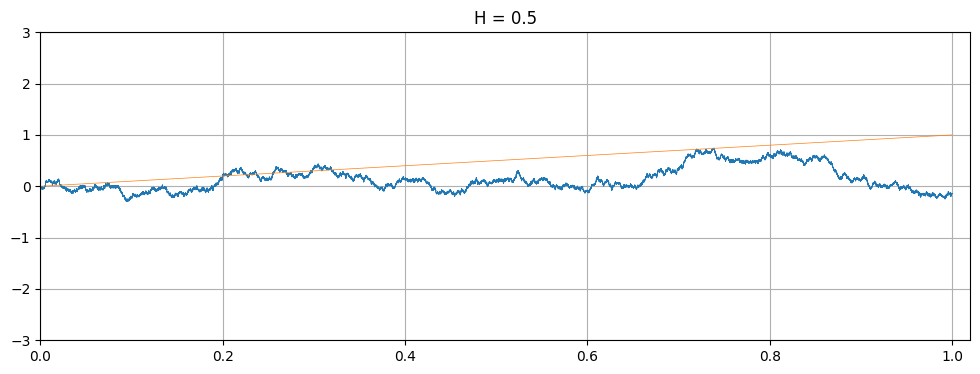

In [6]:
plt.figure(figsize=(12,4)), plt.axis([0, 1.02, -3, 3])
plt.plot(times, W_t, times, quadratic_variation(W_t), linewidth = 0.5) # See quadratic variation converges to T.
plt.title('H = ' + str(H)), plt.grid()

## Auxiliary terms to compute stochastic integrals

In [7]:
delta_t = np.diff(times) # d(t) = t_{i+1} - t_{i}
delta_W_t = np.diff(W_t) # dW(t) = W(t_{i+1}) - W(t_{i})
t_terms = times[:-1] # t_i
W_t_terms = W_t[:-1] # W(t_i)
# T = times[-1] already defined at the beginning
W_T = W_t[-1] # W(T)

# $$\int_0^T W(t)\,dW(t) = \frac{1}{2}W^2(T) - \frac{1}{2}T$$

In [8]:
numerical_int = np.sum(W_t_terms * delta_W_t)
analytical_int = (np.power(W_T,2) - T) / 2
print("Numerical integration: " + str(numerical_int))
print("Analytical integration: " + str(analytical_int))

Numerical integration: -0.4893085773246658
Analytical integration: -0.4893118652772277


# $$\int_0^T W(t) \,d(t) = T W(T) - \int_0^T t \, dW(t)$$

In [9]:
numerical_int = np.sum(W_t_terms * delta_t) 
analytical_int = times[-1]*W_t[-1] - np.sum(t_terms * delta_W_t) 
print("Numerical integration: " + str(numerical_int))
print("Analytical integration: " + str(analytical_int))

Numerical integration: 0.14075382313393595
Analytical integration: 0.14075380688879605


# $$\int_0^T W^2(t) \,dW(t) = \frac{W^3(T) - 3 \int_0^T W(t) \,dt}{3}$$

In [10]:
numerical_int = np.sum(np.power(W_t_terms,2) * delta_W_t)
analytical_int = (np.power(W_T,3) - 3*np.sum(W_t_terms * delta_t)) / 3
print("Numerical integration: " + str(numerical_int))
print("Analytical integration: " + str(analytical_int))

Numerical integration: -0.14159660764951384
Analytical integration: -0.1417956045786001


## I_4(1) in Wiener-Ito Chaos Expansion notation, analytic computation given by Hermite polynomials

## $$4! \int_0^T  \int_0^{t_4} \int_0^{t_3} \int_0^{t_2} (1) \,dW(t_1)dW(t_2)dW(t_3)dW(t_4) = W^4(T) - 6TW^2(T) + 3T^2$$

In [11]:
analytical_int = np.power(W_T,4) - 6*T*np.power(W_T,2) + 3*T**2
print("Analytical integration: " + str(analytical_int))

Analytical integration: 2.8721993282221407
